In [1]:
%load_ext autoreload
%autoreload 2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [5]:
# set working directory
os.chdir('..')
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week1\\Week1-10Academy-User-Analysis'

In [6]:

# from src.preprocessing import PreProcess
# from src.overview import Overview
from src.outliers import Outliers
from src.plots import Plot

In [10]:
df = pd.read_csv('data/preprocessed_telecom_data.csv')

In [155]:
#df2 = pd.read_excel("../data/Week1_challenge_data_source.xlsx")

In [11]:
outlier = Outliers(df)

In [12]:
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  float64
 1   start                           150001 non-null  object 
 2   start_ms                        150001 non-null  float64
 3   end                             150001 non-null  object 
 4   end_ms                          150001 non-null  float64
 5   dur._(ms)                       150001 non-null  float64
 6   imsi                            150001 non-null  float64
 7   msisdn/number                   150001 non-null  float64
 8   imei                            150001 non-null  float64
 9   last_location_name              150001 non-null  object 
 10  avg_rtt_dl_(ms)                 150001 non-null  float64
 11  avg_rtt_ul_(ms)                 150001 non-null  float64
 12  avg_bearer_tp_dl

Initialize plot class

In [16]:
pl = Plot()

In [160]:
# dfdfsdsdsdklkjjkjkjjkklkkjjikjjkjkjkjjkkjjfkldklkldfkldfdfdfdffddffpl.plot_box(df, 'nb_of_sec_with_vol_ul_<_1250b', 'Number of seconds with IP Volume DL < 1250B')

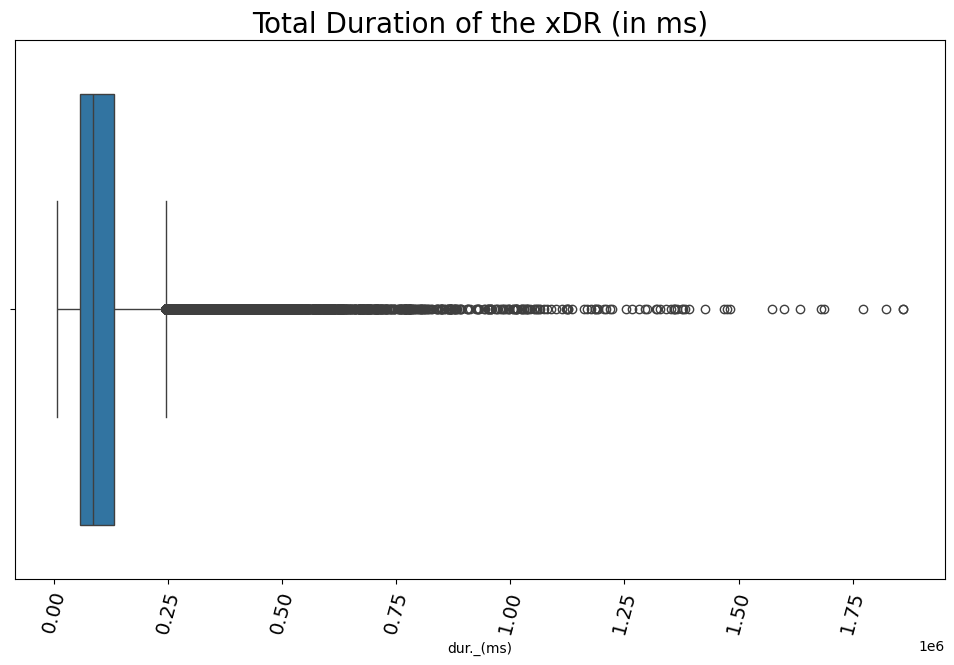

In [17]:
pl.plot_box(df, 'dur._(ms)', 'Total Duration of the xDR (in ms)')

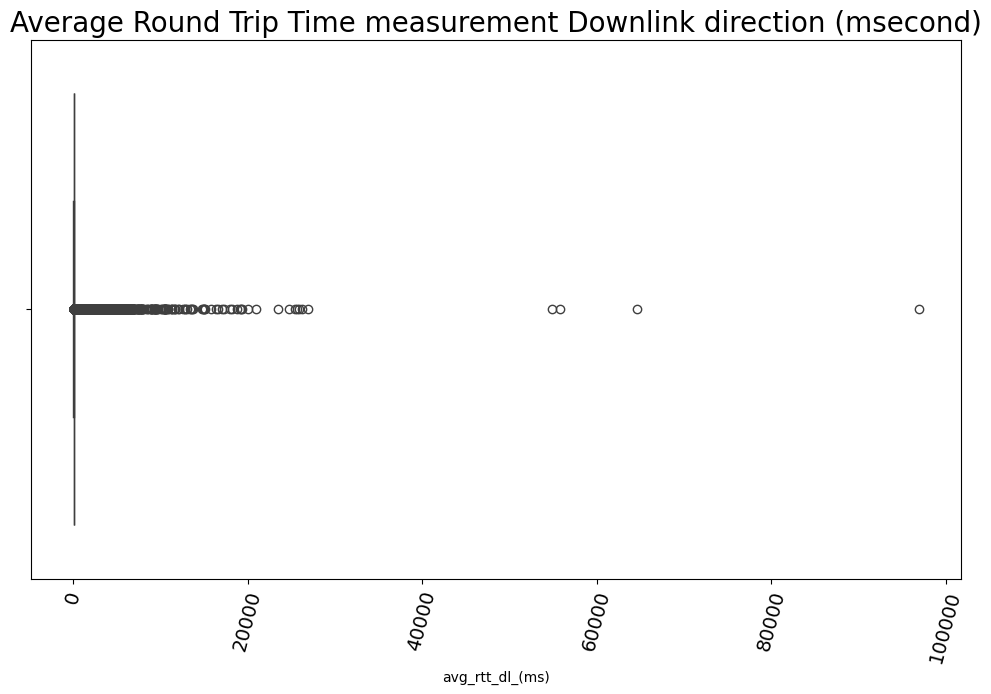

In [18]:
pl.plot_box(df, 'avg_rtt_dl_(ms)', 'Average Round Trip Time measurement Downlink direction (msecond)')

In [19]:
pl.plot_box(df, 'tcp_ul_retrans._vol_(bytes)', 'TCP volume of Uplink packets detected as retransmitted (bytes)')

ValueError: Could not interpret value `tcp_ul_retrans._vol_(bytes)` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x700 with 0 Axes>

In [164]:
#pl.plot_box(df, 'Activity Duration UL (ms)', 'Activity duration ul(ms)')

In [165]:
#pl.plot_box(df, 'Youtube UL (Bytes)', 'YouTube data volume (in Bytes) sent by the MS during this session')

In [166]:
#pl.plot_box(df, 'Total UL (Bytes)', 'Total DL (Bytes)Data volume (in Bytes) received by the MS during this session (IP layer + overhead)')

In [167]:
#pl.plot_box(df, 'Total DL (Bytes)', 'Total UL (Bytes)Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)')

It can be seen that most of the column have outliers

Get Outlier overview

In [168]:
display(outlier.outlier_overview(df, 'activity_duration_ul_(ms)'))

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
38,7.277826e+18,4/18/2019 15:40,982.0,4/25/2019 15:40,33.0,604800.0,2.082095e+14,3.376394e+10,8.616400e+13,T86868A,...,21679309.0,16508079.0,23243098.0,6438422.0,213008522.0,11503163.0,295325210.0,12082520.0,49727524.0,267689014.0
538,7.277826e+18,4/23/2019 23:45,419.0,4/24/2019 23:45,313.0,86399.0,2.082017e+14,3.366726e+10,8.637690e+13,D84798A,...,15444612.0,6669529.0,6791490.0,13137110.0,202645712.0,4345867.0,41485262.0,9191686.0,36072646.0,236941106.0
557,1.304243e+19,4/23/2019 23:56,766.0,4/24/2019 23:56,385.0,86400.0,2.082017e+14,3.366344e+10,8.637690e+13,D83916A,...,16220887.0,15928572.0,10939175.0,4525125.0,603881110.0,4134867.0,228539389.0,4085765.0,29908196.0,642815619.0
635,1.304243e+19,4/24/2019 0:09,773.0,4/25/2019 0:09,678.0,86399.0,2.082015e+14,3.366045e+10,8.637690e+13,D92712B,...,20529706.0,15820629.0,7979963.0,18816877.0,690468982.0,11557228.0,41436710.0,14920555.0,64954877.0,727897527.0
655,7.277826e+18,4/24/2019 0:11,540.0,4/25/2019 0:11,513.0,86399.0,2.082017e+14,3.365830e+10,3.520271e+13,K14666C,...,2504633.0,3938252.0,562323.0,9262751.0,614815032.0,15277882.0,235703378.0,9787240.0,42450423.0,632356629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148359,1.304243e+19,4/29/2019 7:08,248.0,4/30/2019 7:08,208.0,86399.0,2.082014e+14,3.366916e+10,8.637690e+13,T85713B,...,4679867.0,20549288.0,7150333.0,19695300.0,397284051.0,4579066.0,329851993.0,11505030.0,59572655.0,419875450.0
148408,1.304243e+19,4/29/2019 7:09,731.0,4/30/2019 7:09,745.0,86400.0,2.082017e+14,3.366057e+10,8.637690e+13,T85784A,...,12264941.0,1357151.0,21986225.0,21997101.0,529842696.0,4755600.0,17710673.0,16106399.0,44841066.0,579178272.0
148994,1.304243e+19,4/29/2019 7:16,675.0,4/30/2019 7:16,689.0,86400.0,2.082018e+14,3.366725e+10,8.637690e+13,D85941B,...,16205072.0,20135265.0,4347335.0,13449484.0,67039315.0,10111864.0,772022712.0,377322.0,45124501.0,90680481.0
148998,7.277826e+18,4/29/2019 7:16,452.0,4/30/2019 7:16,469.0,86400.0,2.082017e+14,3.376216e+10,8.637690e+13,T78199C,...,16189977.0,19719459.0,18237162.0,8180771.0,460606860.0,11194362.0,330556976.0,2329454.0,46062056.0,503379057.0


565 rows with outliers

In [169]:
display(outlier.outlier_overview(df, 'tcp_ul_retrans._vol_(bytes)'))

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
566,1.304243e+19,4/24/2019 0:00,698.0,4/25/2019 0:00,236.0,86403.0,2.082015e+14,3.365829e+10,3.592631e+13,L42997A,...,14167452.0,16687696.0,20674616.0,15219817.0,667514871.0,13291774.0,342138442.0,13294433.0,62025879.0,712700408.0
788,1.304243e+19,4/24/2019 0:22,489.0,4/25/2019 0:22,461.0,86399.0,2.082014e+14,3.366027e+10,8.654080e+13,T88349B,...,787496.0,15618631.0,12824807.0,10070595.0,832811516.0,3650083.0,405294647.0,6010671.0,37234541.0,858057935.0
821,1.304243e+19,4/24/2019 0:26,254.0,4/25/2019 0:26,177.0,86399.0,2.082010e+14,3.366228e+10,8.654080e+13,L85966B,...,14040294.0,2757831.0,17429785.0,15843551.0,41103853.0,2635642.0,672644941.0,609546.0,26706635.0,81434881.0
1246,1.304243e+19,4/24/2019 1:15,318.0,4/25/2019 1:15,734.0,86452.0,2.082017e+14,3.376314e+10,8.637690e+13,T88449B,...,4952237.0,8113457.0,22300544.0,3575703.0,231968638.0,6783826.0,672789523.0,12621381.0,35045982.0,267636706.0
1381,7.277826e+18,4/24/2019 1:26,132.0,4/25/2019 1:26,44.0,86399.0,2.082018e+14,3.366845e+10,8.637690e+13,T21355A,...,17235232.0,12879086.0,17019426.0,5646999.0,267351464.0,14525412.0,740161901.0,9615407.0,43983168.0,310983536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143416,7.277826e+18,4/29/2019 4:55,60.0,4/30/2019 4:55,674.0,86400.0,2.082019e+14,3.365802e+10,8.672620e+13,L10326C,...,19658514.0,9696167.0,10445046.0,10645489.0,69768358.0,9369007.0,422158065.0,5331060.0,39155404.0,109745693.0
143597,1.304243e+19,4/29/2019 4:59,318.0,4/30/2019 4:59,193.0,86399.0,2.082017e+14,3.365927e+10,8.637690e+13,T88844C,...,3404332.0,9622909.0,10899189.0,4644588.0,314857668.0,1998381.0,183518923.0,13099413.0,32361826.0,344894438.0
143662,7.277826e+18,4/29/2019 5:01,107.0,4/30/2019 5:01,948.0,86398.0,2.082010e+14,3.369938e+10,8.637690e+13,D93656A,...,1824702.0,20827969.0,220153.0,8444865.0,824128190.0,4161163.0,221240777.0,12139630.0,47152790.0,834468459.0
145428,1.304243e+19,4/29/2019 6:09,700.0,4/30/2019 6:09,140.0,86400.0,2.082017e+14,3.366833e+10,8.637690e+13,D88357A,...,20392237.0,9395084.0,4335545.0,15007554.0,24591692.0,14249920.0,136229675.0,7042829.0,46273702.0,59930864.0


125 rows with outliers

Calculate number of outliers for each numeric column

Select the numeric columns

In [170]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
df.dtypes

bearer_id                         float64
start                              object
start_ms                          float64
end                                object
end_ms                            float64
dur._(ms)                         float64
imsi                              float64
msisdn/number                     float64
imei                              float64
last_location_name                 object
avg_rtt_dl_(ms)                   float64
avg_rtt_ul_(ms)                   float64
avg_bearer_tp_dl_(kbps)           float64
avg_bearer_tp_ul_(kbps)           float64
dl_tp_<_50_kbps_(%)               float64
50_kbps_<_dl_tp_<_250_kbps_(%)    float64
250_kbps_<_dl_tp_<_1_mbps_(%)     float64
dl_tp_>_1_mbps_(%)                float64
ul_tp_<_10_kbps_(%)               float64
10_kbps_<_ul_tp_<_50_kbps_(%)     float64
50_kbps_<_ul_tp_<_300_kbps_(%)    float64
ul_tp_>_300_kbps_(%)              float64
activity_duration_dl_(ms)         float64
activity_duration_ul_(ms)         

In [25]:
num_cols = df.select_dtypes(include=np.number).columns

In [26]:
dlist = ['bearer_id', 'start_ms', 'end_ms', 'imsi', 'msisdn/number', 'imei']

In [27]:
num_cols = [el for el in num_cols if el not in dlist]

In [28]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df[col])
    print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

TypeError: object of type 'int' has no len()

Handle outliers for each numeric column by scaling the data

In [176]:
df = outlier.handle_outliers(df, num_cols)

/Users/basilel/Documents/Telecom-Data-Analysis/src/outlier.py:34: RuntimeWarning: divide by zero encountered in log
  df[col] = [np.log(x) for x in df[col]]


In [177]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df[col])
    print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

Outliers from Z-scores method of dur._(ms) 500
Outliers from Z-scores method of avg_rtt_dl_(ms) 0
Outliers from Z-scores method of avg_rtt_ul_(ms) 0
Outliers from Z-scores method of avg_bearer_tp_dl_(kbps) 0


/Users/basilel/Documents/Telecom-Data-Analysis/src/outlier.py:51: RuntimeWarning: invalid value encountered in scalar subtract
  z_score = (i-mean)/std


Outliers from Z-scores method of avg_bearer_tp_ul_(kbps) 0
Outliers from Z-scores method of tcp_dl_retrans._vol_(bytes) 3049
Outliers from Z-scores method of tcp_ul_retrans._vol_(bytes) 3857
Outliers from Z-scores method of dl_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_dl_tp_<_250_kbps_(%) 0
Outliers from Z-scores method of 250_kbps_<_dl_tp_<_1_mbps_(%) 0
Outliers from Z-scores method of dl_tp_>_1_mbps_(%) 0
Outliers from Z-scores method of ul_tp_<_10_kbps_(%) 0
Outliers from Z-scores method of 10_kbps_<_ul_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_ul_tp_<_300_kbps_(%) 0
Outliers from Z-scores method of ul_tp_>_300_kbps_(%) 0
Outliers from Z-scores method of http_dl_(bytes) 2530
Outliers from Z-scores method of http_ul_(bytes) 2171
Outliers from Z-scores method of activity_duration_dl_(ms) 0
Outliers from Z-scores method of activity_duration_ul_(ms) 0
Outliers from Z-scores method of dur._(ms).1 500
Outliers from Z-scores method of nb_of_sec_with_

Data needs further preprocessing as there are some outliers in the data

In [178]:
outlier_columns = []
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df[col])
    if len(sample_outliers) > 0:
        outlier_columns.append(col)

In [179]:
len(outlier_columns)

29

In [180]:
df_cop = df.copy()

Scaling the data

In [181]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
scaled_data = df.copy()

scaled_data.sample(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
63399,7.349883e+18,4/26/2019 6:32,441.0,4/27/2019 18:47,410.0,11.778998,2.082017e+14,3.366030e+10,3.553781e+13,T19259A,...,15.730680,16.202195,15.576845,16.421906,20.346745,13.684214,20.235109,16.335324,17.536929,20.367902
28283,1.311448e+19,4/24/2019 7:26,726.0,4/26/2019 8:48,942.0,12.087886,2.082010e+14,3.366975e+10,3.570111e+13,D79670A,...,15.868884,16.486418,16.549086,15.978441,20.304320,16.285959,20.480384,16.240899,17.678603,20.346945
48542,1.311448e+19,4/25/2019 7:39,69.0,4/26/2019 8:56,437.0,11.418736,2.082014e+14,3.367587e+10,3.589521e+13,D73566C,...,16.924250,16.004911,15.274156,15.638189,20.397777,13.656034,20.303297,15.406344,16.991387,20.453581
84111,1.311448e+19,4/27/2019 10:51,982.0,4/28/2019 0:20,153.0,10.790823,2.082014e+14,3.376069e+10,8.699070e+13,T21469A,...,14.679575,16.336049,15.948703,16.664682,20.275437,16.423921,15.205715,15.940235,17.789584,20.316098
79698,6.917538e+18,4/27/2019 7:31,29.0,4/28/2019 4:06,542.0,11.213468,2.082014e+14,3.366817e+10,3.537281e+13,G15735A,...,14.199800,16.824948,16.029245,16.594183,18.903097,13.348396,20.340864,16.217038,17.725386,18.989811


In [182]:
df_cop[outlier_columns].shape #= scaled_data
scaled_data.shape

(150001, 55)

In [183]:
scaled_data = minmax_scaler.fit_transform(scaled_data[outlier_columns])

In [184]:
scaled_data.shape

(150001, 29)

In [185]:
outlier_columns = []
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df_cop[col])
    if len(sample_outliers) > 0:
        outlier_columns.append(col)

/Users/basilel/Documents/Telecom-Data-Analysis/src/outlier.py:51: RuntimeWarning: invalid value encountered in scalar subtract
  z_score = (i-mean)/std


In [186]:
len(outlier_columns)

29

In [187]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df_cop[col])
    print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

Outliers from Z-scores method of dur._(ms) 500
Outliers from Z-scores method of avg_rtt_dl_(ms) 0
Outliers from Z-scores method of avg_rtt_ul_(ms) 0
Outliers from Z-scores method of avg_bearer_tp_dl_(kbps) 0
Outliers from Z-scores method of avg_bearer_tp_ul_(kbps) 0
Outliers from Z-scores method of tcp_dl_retrans._vol_(bytes) 3049
Outliers from Z-scores method of tcp_ul_retrans._vol_(bytes) 3857
Outliers from Z-scores method of dl_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_dl_tp_<_250_kbps_(%) 0
Outliers from Z-scores method of 250_kbps_<_dl_tp_<_1_mbps_(%) 0
Outliers from Z-scores method of dl_tp_>_1_mbps_(%) 0
Outliers from Z-scores method of ul_tp_<_10_kbps_(%) 0
Outliers from Z-scores method of 10_kbps_<_ul_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_ul_tp_<_300_kbps_(%) 0
Outliers from Z-scores method of ul_tp_>_300_kbps_(%) 0
Outliers from Z-scores method of http_dl_(bytes) 2530
Outliers from Z-scores method of http_ul_(bytes) 2171
Outliers fr

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: >

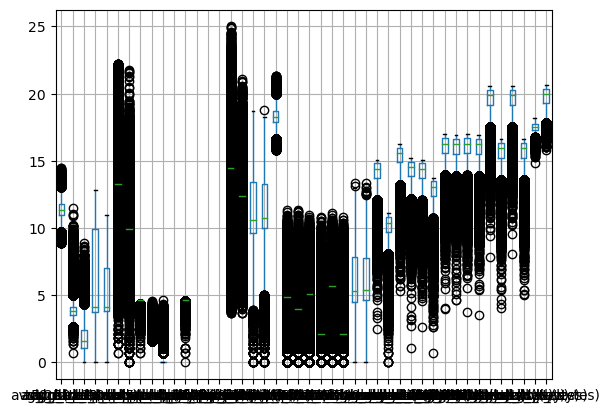

In [188]:
df_cop[num_cols].boxplot()

Most of the outliers have been handled

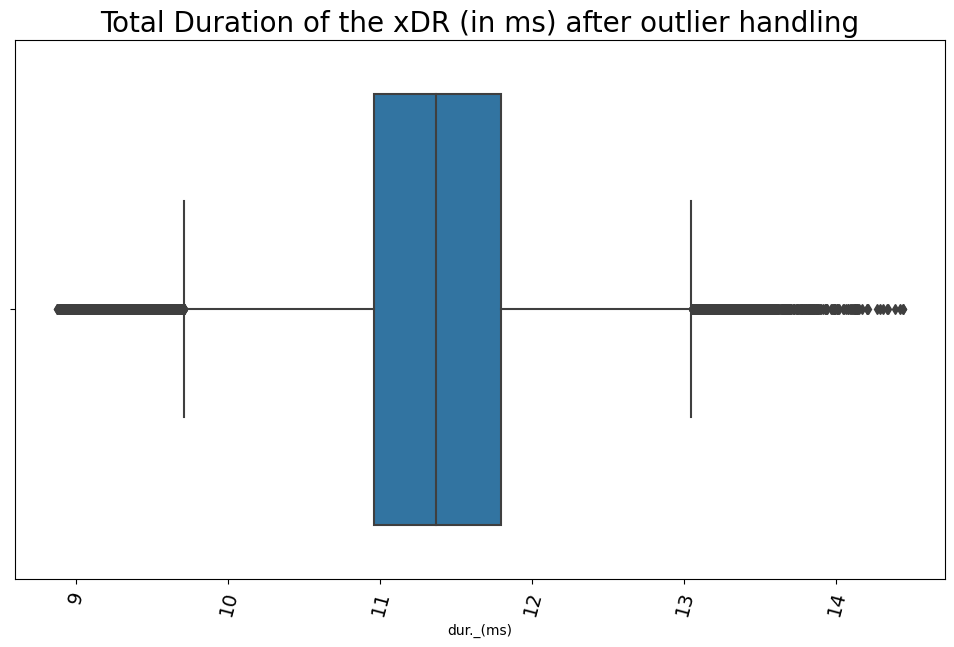

In [189]:
pl.plot_box(df_cop, 'dur._(ms)', 'Total Duration of the xDR (in ms) after outlier handling')

In [190]:
df_cop.describe()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtrac

,bearer_id,start_ms,end_ms,dur._(ms),imsi,msisdn/number,imei,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
count,1.500010e+05,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,...,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,1.012045e+19,499.188199,498.800888,11.315589,2.082016e+14,4.182441e+10,4.842592e+13,-inf,-inf,-inf,...,15.963339,15.907689,15.960316,15.905965,19.552311,15.623673,19.550172,15.619125,17.489536,19.716029
std,2.892438e+18,288.610872,288.096693,0.728958,2.144723e+10,2.438731e+12,2.238739e+13,NaN,NaN,NaN,...,0.999826,1.001628,1.002698,1.001366,1.001953,1.000328,1.004539,1.006696,0.304412,0.760145
min,6.917538e+18,0.000000,0.000000,8.873748,2.040471e+14,3.360100e+10,4.400152e+11,-inf,-inf,-inf,...,3.970292,4.653960,3.737670,3.555348,7.830426,4.077537,8.098643,4.997212,14.868739,15.777581
25%,7.349883e+18,250.000000,251.000000,10.958531,2.082014e+14,3.365151e+10,3.546261e+13,3.555348e+00,1.098612e+00,3.761200e+00,...,15.579128,15.523520,15.569422,15.515882,19.164869,15.233419,19.163508,15.237641,17.318724,19.309013
50%,7.349883e+18,499.000000,500.000000,11.366731,2.082015e+14,3.366371e+10,3.572201e+13,3.806662e+00,1.609438e+00,4.143135e+00,...,16.267896,16.214628,16.270148,16.213077,19.863847,15.930706,19.860049,15.927791,17.532572,19.937655
75%,1.304243e+19,749.000000,750.000000,11.793809,2.082018e+14,3.368307e+10,8.611970e+13,4.127134e+00,2.397895e+00,9.888881e+00,...,16.674765,16.619814,16.676023,16.619311,20.266256,16.335754,20.263912,16.331928,17.708029,20.316357
max,1.318654e+19,999.000000,999.000000,14.435730,2.140743e+14,8.823971e+14,9.900120e+13,1.148167e+01,8.870663e+00,1.284307e+01,...,16.962207,16.907097,16.962211,16.907096,20.553002,16.622428,20.553002,16.622429,18.176458,20.621199


Save the data



In [191]:
df_cop.to_csv('../data/cleaned_data_outliers.csv', index=False)